This Python document presents the data analytics of the Spotify 2017 Daily World Rankings dataset. This aims to answer the following exploratory data analysis questions:

1. Who are the top 20 most streamed artist in the Philippines in 2017? Display the number of streams in millions?
2. What are the top 20 songs that appeared the most in the Daily World Rankings in the Philippines?
3. Who are the top 20 artist that has the most number of songs in the Daily World Rankings in the Philippines?
4. Who are the top 20 artist that has the most number of unique songs in the Daily World Rankings in the Philippines? What do you think is the reason for this? Give insights with supporting details.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-charts/charts.csv


In [62]:
# import modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# seaborn theme
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
# import dataset
df = pd.read_csv('/kaggle/input/spotify-charts/charts.csv')

df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [7]:
# Preliminary Exploratory Data Analysis

display(df.shape)
display(df.info())

(26173514, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


None

In [8]:
# Data Type Fix
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   url      object        
 5   region   object        
 6   chart    object        
 7   trend    object        
 8   streams  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ GB


In [9]:
df['date'].value_counts()

2020-12-24    17022
2021-07-16    17009
2021-05-21    16997
2021-11-26    16974
2021-06-11    16944
              ...  
2021-12-27     4834
2021-12-26     4831
2017-05-31     2778
2017-06-02     2777
2017-05-30     2773
Name: date, Length: 1826, dtype: int64

In [11]:
df['region'].value_counts()

Argentina        455308
United States    455057
Austria          454593
Brazil           454439
Australia        453103
                  ...  
Ukraine          127544
Russia           126837
Luxembourg        98053
Andorra           79592
South Korea       76276
Name: region, Length: 70, dtype: int64

Let's Filter the dataset so it's easier to work with.

In [12]:
# create a column that stores the year
df['year'] = df['date'].dt.year

df['year'].unique()

array([2017, 2018, 2020, 2019, 2021])

In [13]:
# filter based on year and region in top 200 chart
spotify_ph_2017 = df[(df['year'] == 2017) & (df['region'] == 'Philippines') & (df['chart'] == 'top200')]

spotify_ph_2017.head()

,title,rank,date,artist,url,region,chart,trend,streams,year
6221,Versace on the Floor,1,2017-01-01,Bruno Mars,https://open.spotify.com/track/0kN8xEmgMW9mh7U...,Philippines,top200,MOVE_UP,185236.0,2017
6222,Say You Won't Let Go,2,2017-01-01,James Arthur,https://open.spotify.com/track/5uCax9HTNlzGybI...,Philippines,top200,MOVE_UP,180552.0,2017
6223,Closer,3,2017-01-01,"The Chainsmokers, Halsey",https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Philippines,top200,MOVE_DOWN,158720.0,2017
6224,All We Know,4,2017-01-01,"The Chainsmokers, Phoebe Ryan",https://open.spotify.com/track/2rizacJSyD9S1IQ...,Philippines,top200,MOVE_UP,130874.0,2017
6225,Don't Wanna Know,5,2017-01-01,"Maroon 5, Kendrick Lamar",https://open.spotify.com/track/5MFzQMkrl1FOOng...,Philippines,top200,MOVE_DOWN,129656.0,2017


In [14]:
# check for missing values

display(spotify_ph_2017.shape)
display(spotify_ph_2017.isna().any(), 
        spotify_ph_2017.isna().sum())

(72390, 10)

title      False
rank       False
date       False
artist     False
url        False
region     False
chart      False
trend      False
streams    False
year       False
dtype: bool

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
year       0
dtype: int64

It seems that we have a clean data.

# 1. Who are the top 20 most streamed artist in the Philippines in 2017? Display the number of streams in millions?

artist
Ed Sheeran                                 196795860.0
Bruno Mars                                 112082581.0
Moira Dela Torre                            61380273.0
LANY                                        56323962.0
James Arthur                                52239272.0
Charlie Puth                                51661226.0
Clean Bandit                                48378089.0
Sam Smith                                   45292527.0
The Chainsmokers                            42641411.0
Lauv                                        40184605.0
Khalid                                      39090055.0
The Chainsmokers, Coldplay                  38343683.0
Silent Sanctuary                            37799476.0
Maroon 5                                    37216572.0
Little Mix                                  35331063.0
Shawn Mendes                                35062388.0
Luis Fonsi, Daddy Yankee, Justin Bieber     34257558.0
DJ Khaled                                   33615910.0
SUD

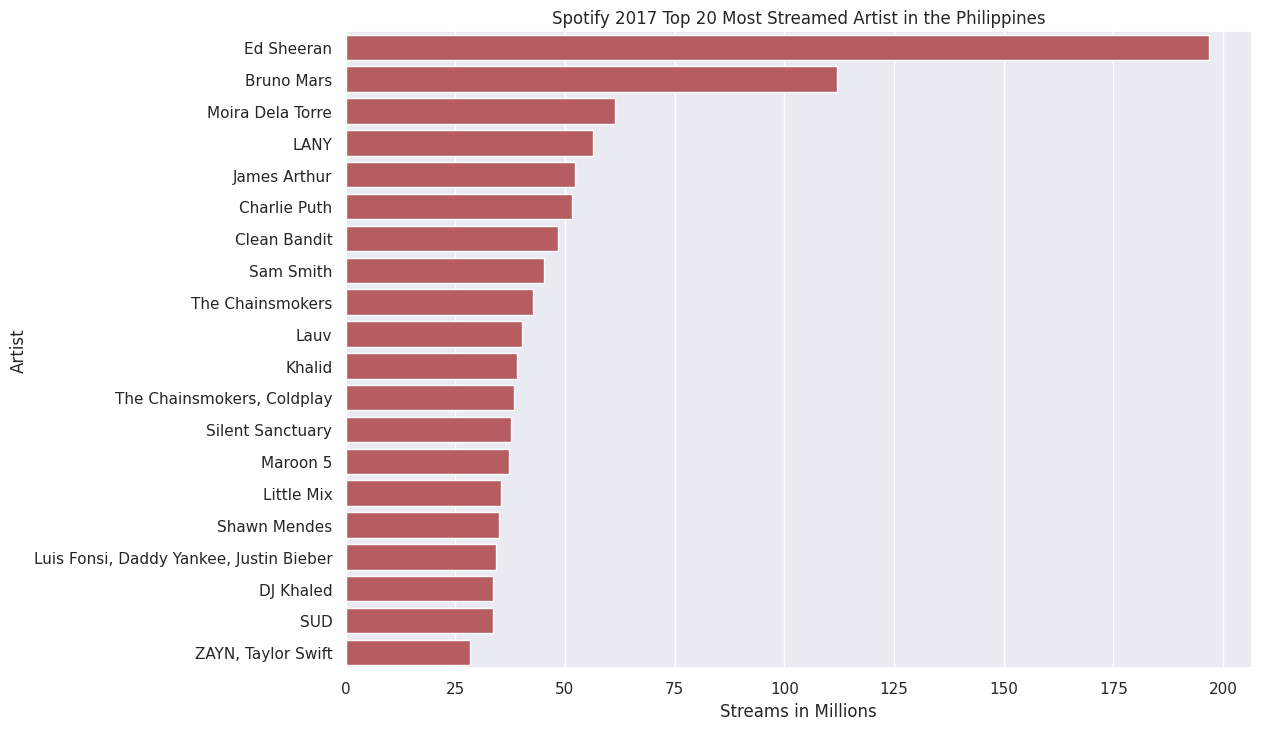

In [68]:
top_artist = spotify_ph_2017.groupby('artist')['streams'].sum().sort_values(ascending = False).nlargest(20)

display(top_artist)

ax = sns.barplot(y=top_artist.index, x=top_artist.values, color='r')
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_title("Spotify 2017 Top 20 Most Streamed Artist in the Philippines")
ax.set_xlabel("Streams in Millions")
ax.set_ylabel("Artist")
plt.show()

**Ed Sheeran** dominates the airwaves in the Philippines on Spotify for 2017 with whopping 196 million streams!

# 2. What are the top 20 songs that appeared the most in the Daily World Rankings in the Philippines?

In [181]:
top_songs = spotify_ph_2017.groupby(['artist', 'title'])['streams'].count().sort_values(ascending = False).nlargest(30)
top_songs

artist                                title                                                                                                             
Sam Smith                             I'm Not The Only One                                                                                                  362
James Arthur                          Say You Won't Let Go                                                                                                  362
Michael Pangilinan                    Hanggang Kailan                                                                                                       362
Isaiah Firebrace                      It's Gotta Be You                                                                                                     362
Andy Grammer                          Fresh Eyes                                                                                                            362
Coldplay                              The Scien

It seems that more than 20 songs appeared in the top 20 songs. We can rank them according to appearances and total streams.

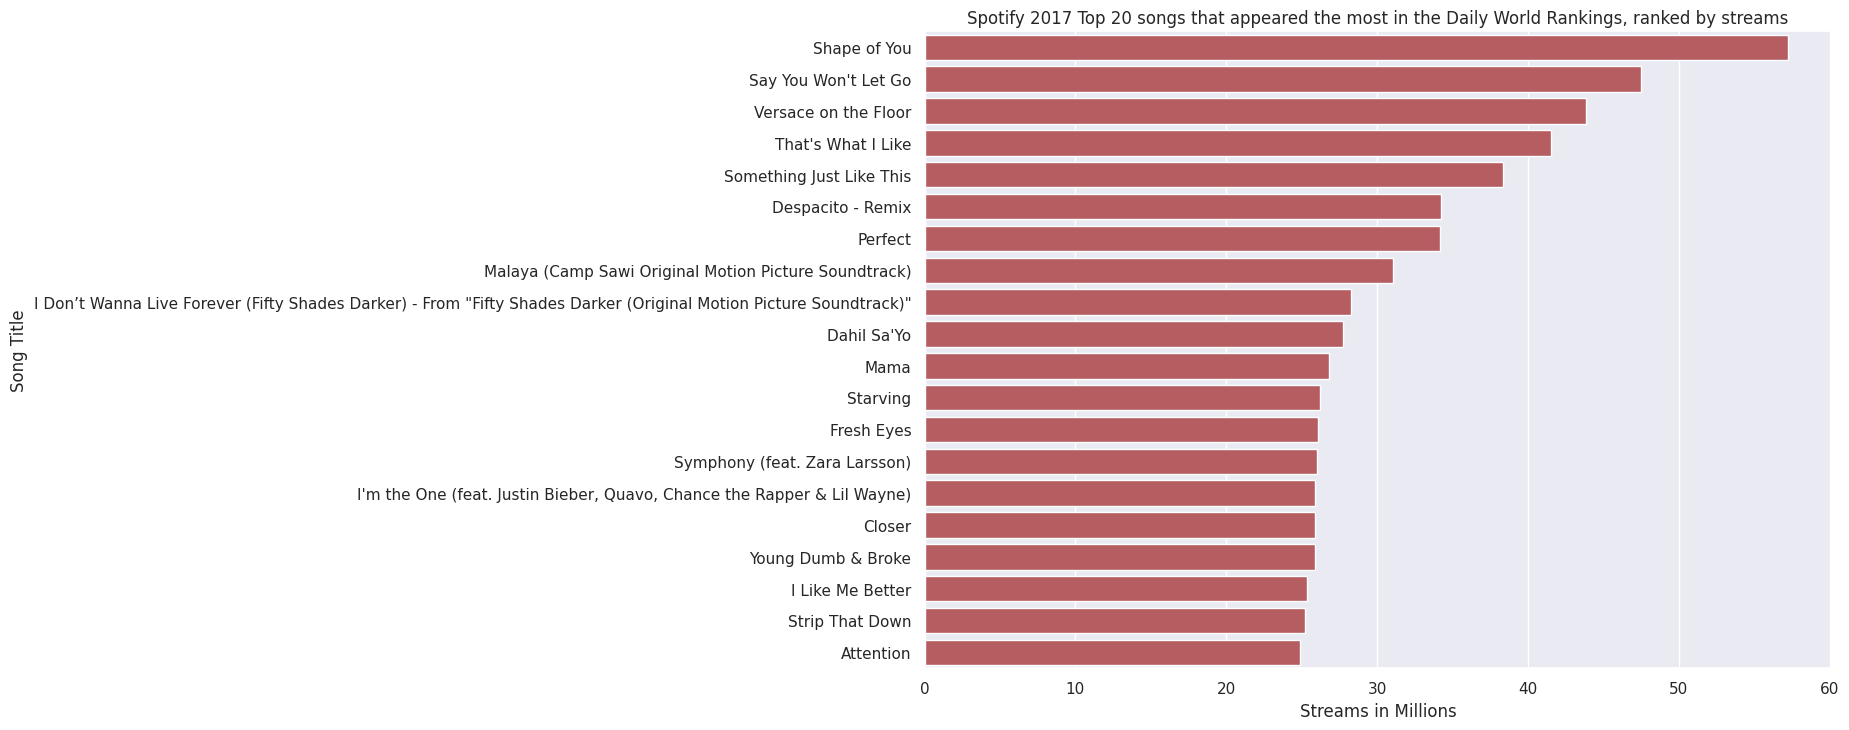

In [220]:
top_songs_df = top_songs.reset_index()
top_songs_df_filtered = top_songs_df[top_songs_df['streams'] == 362]

df_appear = spotify_ph_2017[(spotify_ph_2017['artist'].isin(top_songs_df_filtered['artist']))
                         & (spotify_ph_2017['title'].isin(top_songs_df_filtered['title']))]

top_songs_appear = spotify_ph_2017.groupby('title')['streams'].sum().sort_values(ascending = False).nlargest(20)

ax = sns.barplot(y=top_songs_appear.index, x=top_songs_appear.values, color='r')
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_title("Spotify 2017 Top 20 songs that appeared the most in the Daily World Rankings, ranked by streams")
ax.set_xlabel("Streams in Millions")
ax.set_ylabel("Song Title")
plt.show()

# 3. Top 20 Artist that has the Most Number of Songs in the Daily World Rankings in the Philippines on Spotify (2017)

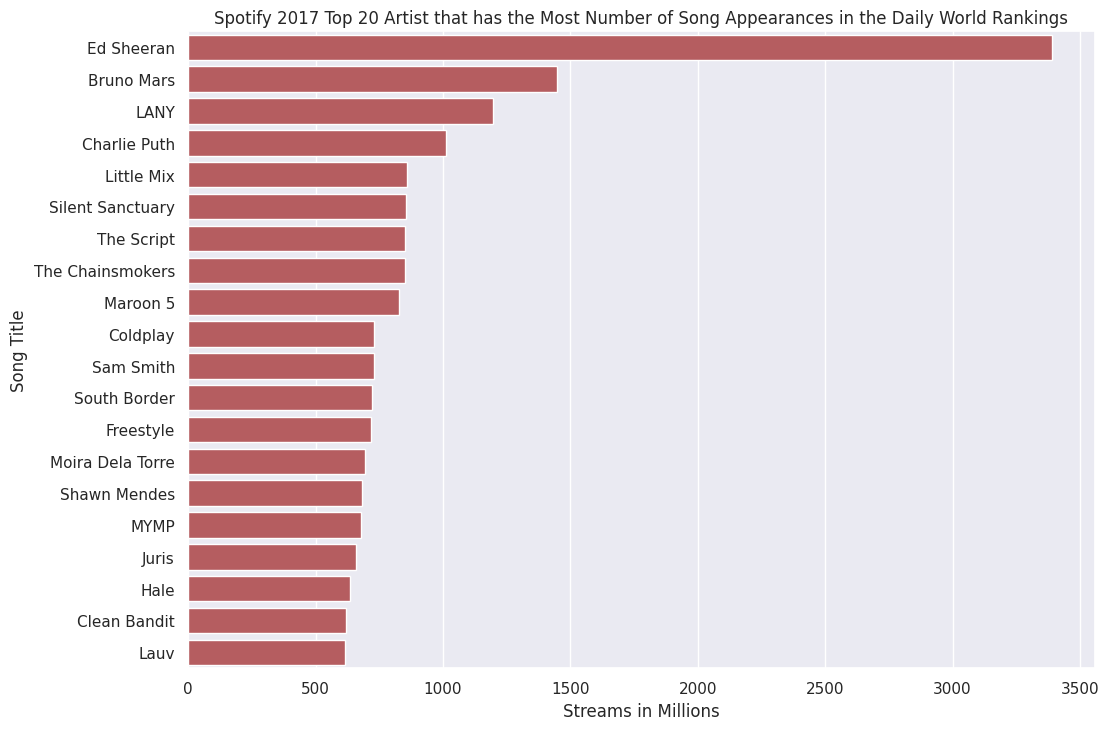

In [222]:
top_artist_songs = spotify_ph_2017.groupby('artist')['title'].count().sort_values(ascending=False).nlargest(20)

ax = sns.barplot(y=top_artist_songs.index, x=top_artist_songs.values, color='r')
ax.set_title("Spotify 2017 Top 20 Artist that has the Most Number of Song Appearances in the Daily World Rankings")
ax.set_xlabel("Song Appearances")
ax.set_ylabel("Artist")
plt.show()

# 4. Who are the top 20 artist that has the most number of unique songs in the Daily World Rankings in the Philippines? What do you think is the reason for this? Give insights with supporting details.

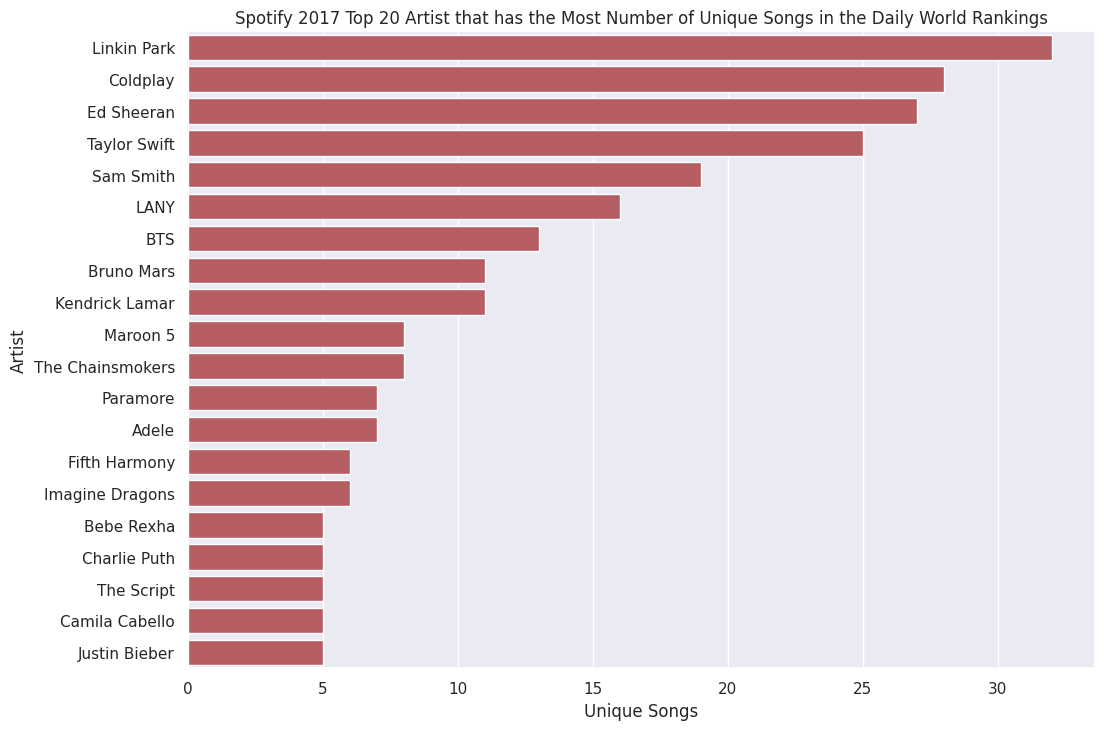

In [223]:
unique_artist_songs = spotify_ph_2017.drop_duplicates(subset=['artist', 'title'])
top_artist_unique_songs = unique_artist_songs.groupby('artist')['title'].count().sort_values(ascending=False).nlargest(20)

ax = sns.barplot(y=top_artist_unique_songs.index, x=top_artist_unique_songs.values, color='r')
ax.set_title("Spotify 2017 Top 20 Artist that has the Most Number of Unique Songs in the Daily World Rankings")
ax.set_xlabel("Unique Songs")
ax.set_ylabel("Artist")
plt.show()

Linkin Park??? Linkin Park is a popular rock band in early to mid 2000s. Why is that? Unfortunately, Chester Bennington, the lead vocalist of the rock, had died in year 2017 as a result of suicide. His death sparked reminiscence in his songs.

<AxesSubplot: xlabel='date', ylabel='streams'>

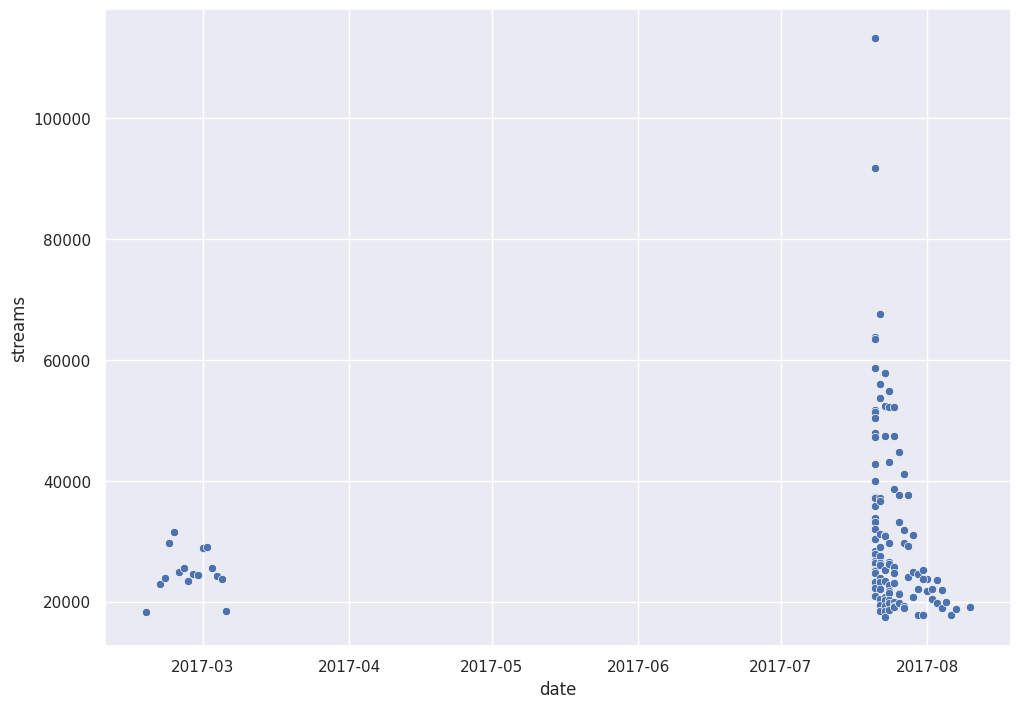

In [221]:
linkin_park_streams = spotify_ph_2017[spotify_ph_2017['artist'] == 'Linkin Park']

sns.scatterplot(data=linkin_park_streams, x='date', y='streams')

On July 20, 2017, Chester was found dead at his home in California; it was concluded that he had died as a result of suicide.